In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# 1.Importing Datasets

In [2]:
churn_data=pd.read_csv("data/Customer-Churn-Records.csv")
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
seg_data=pd.read_csv("data/segments0324.csv")
seg_data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,Cluster_Label
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1,3
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1,2
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,...,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1,3
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,...,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1,4
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,...,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,...,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0,2
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,...,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0,1
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,...,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1,3
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,...,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1,3


In [4]:
print("\nChurn Data:")
print(churn_data.info())
print(churn_data.describe())


Churn Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64

In [5]:
print("\nSegmentation Data:")
print(seg_data.info())
print(seg_data.describe())


Segmentation Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases 

# 2.Exploratory Data Analysis

In [6]:
churn_data=churn_data.drop(["RowNumber","CustomerId","Surname" ],axis=1)
seg_data=seg_data[["Age", "Gender","Income", "Cluster_Label"]]

For the sake of protecting customer privacy, we eliminate Surname information. RowNumber and CustomerId are not relavant infomation for model training. Cluster_Label is the result of customer segmentation from A1, which is high correlated with the rest of features in segmentation dataset. Thus, besides Cluster_Label, we only retain Age, Gender, and Income for the purpose of merging datasets.

## 2.1 Univariate Analysis

### 2.1.1 Categorical Variable

<Axes: title={'center': 'Satisfaction Score'}, xlabel='Satisfaction Score', ylabel='count'>

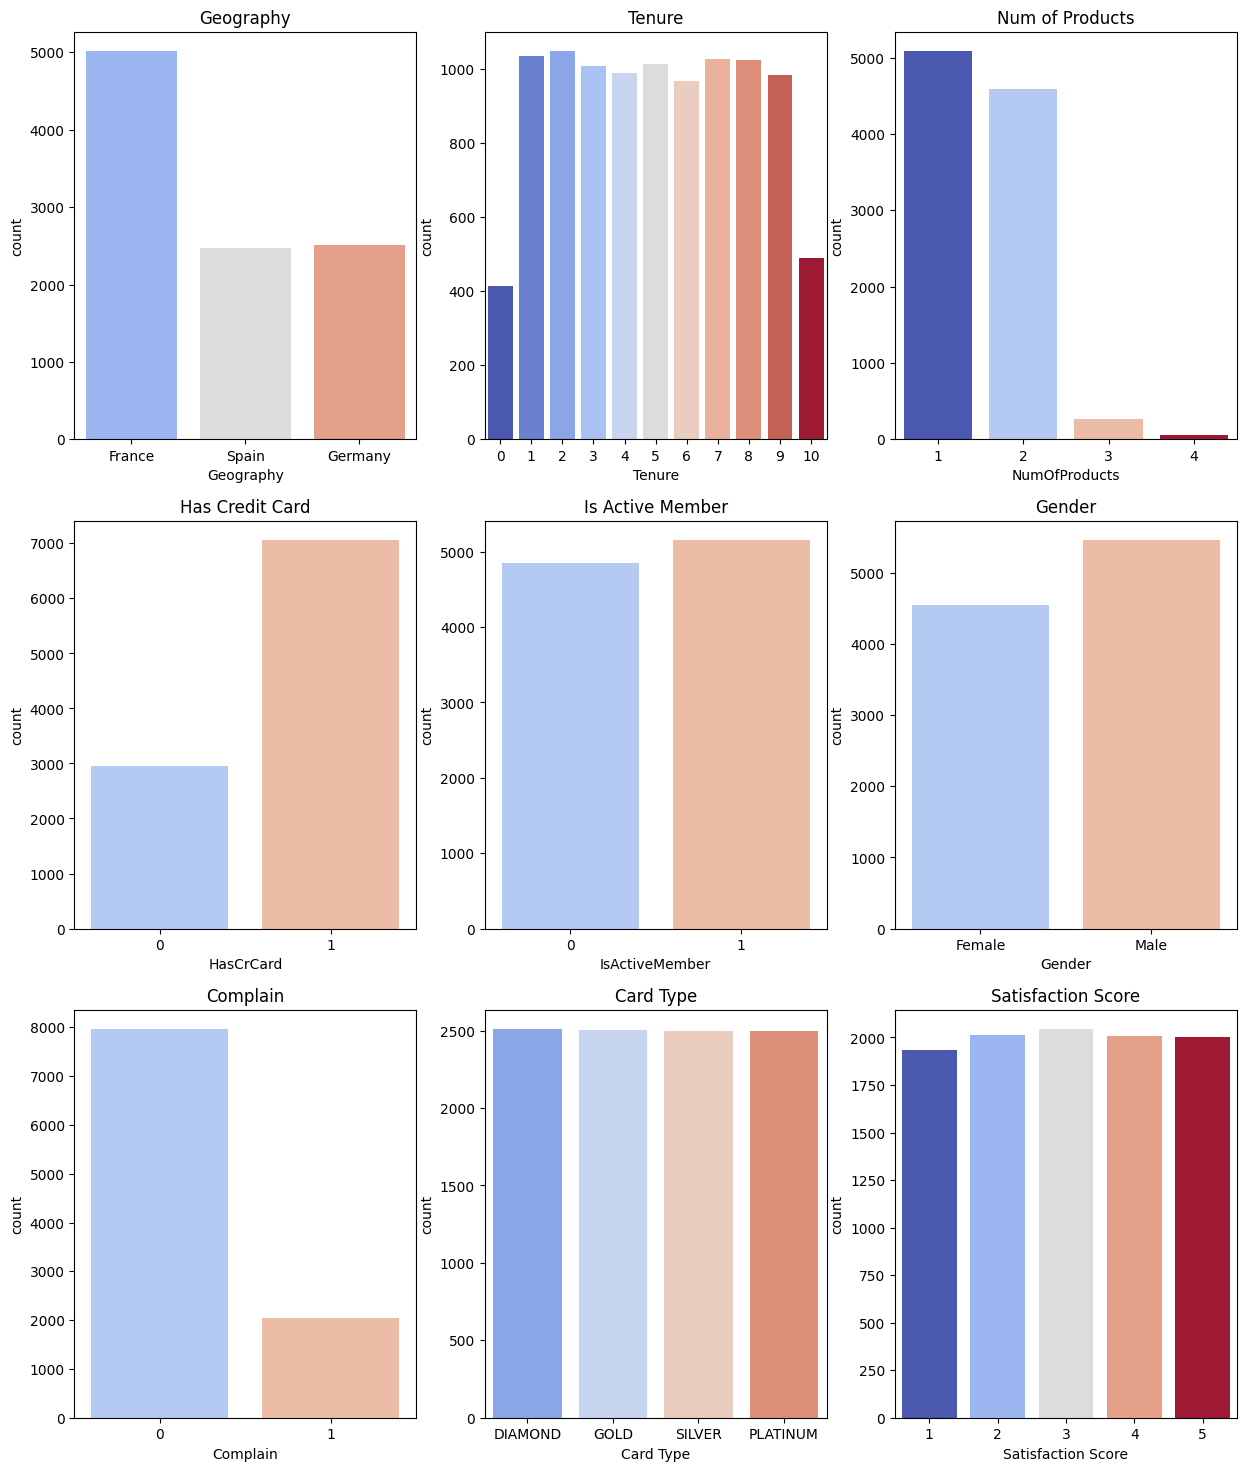

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 18))

# Geography
axes[0,0].set_title('Geography')
sns.countplot(x=churn_data['Geography'], hue=churn_data['Geography'], palette='coolwarm', ax=axes[0,0], legend=False)

# Tenure
axes[0,1].set_title('Tenure')
sns.countplot(x=churn_data['Tenure'], hue=churn_data['Tenure'], palette='coolwarm', ax=axes[0,1], legend=False)

# Num of Products
axes[0,2].set_title('Num of Products')
sns.countplot(x=churn_data['NumOfProducts'], hue=churn_data['NumOfProducts'], palette='coolwarm', ax=axes[0,2], legend=False)

# Has Credit Card (fixed typo: HasCraft → HasCrCard)
axes[1,0].set_title('Has Credit Card')
sns.countplot(x=churn_data['HasCrCard'], hue=churn_data['HasCrCard'], palette='coolwarm', ax=axes[1,0], legend=False)

# Is Active Member
axes[1,1].set_title('Is Active Member')
sns.countplot(x=churn_data['IsActiveMember'], hue=churn_data['IsActiveMember'], palette='coolwarm', ax=axes[1,1], legend=False)

# Gender
axes[1,2].set_title('Gender')
sns.countplot(x=churn_data['Gender'], hue=churn_data['Gender'], palette='coolwarm', ax=axes[1,2], legend=False)

# Complain
axes[2,0].set_title('Complain')
sns.countplot(x=churn_data['Complain'], hue=churn_data['Complain'], palette='coolwarm', ax=axes[2,0], legend=False)

# Card Type
axes[2,1].set_title('Card Type')
sns.countplot(x=churn_data['Card Type'], hue=churn_data['Card Type'], palette='coolwarm', ax=axes[2,1], legend=False)

# Satisfaction Score
axes[2,2].set_title('Satisfaction Score')
sns.countplot(x=churn_data['Satisfaction Score'], hue=churn_data['Satisfaction Score'], palette='coolwarm', ax=axes[2,2], legend=False)

Most of our categorical variables are well distributed, we can see that our customers are mostly from France, with the gender variable well distributed, and usually with 1 or 2 products.

### 2.1.2 Continuous Variable 

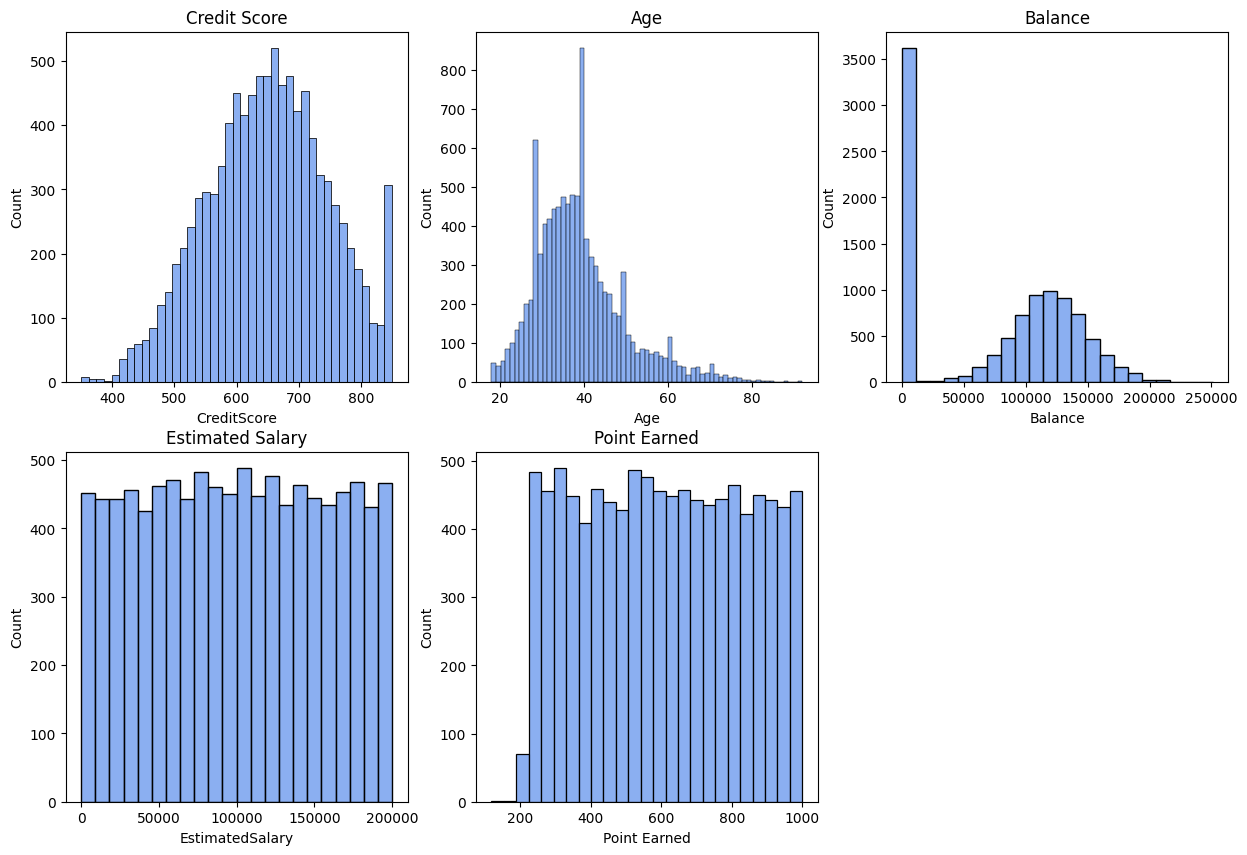

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].set_title('Credit Score')
sns.histplot(x = churn_data['CreditScore'], color='cornflowerblue', ax=axes[0,0])

axes[0,1].set_title('Age')
sns.histplot(x = churn_data['Age'], color='cornflowerblue', ax=axes[0,1])

axes[0,2].set_title('Balance')
sns.histplot(x = churn_data['Balance'], color='cornflowerblue', ax=axes[0,2])

axes[1,0].set_title('Estimated Salary')
sns.histplot(x = churn_data['EstimatedSalary'], color='cornflowerblue', ax=axes[1,0])

axes[1,1].set_title('Point Earned')
sns.histplot(x = churn_data['Point Earned'], color='cornflowerblue', ax=axes[1,1])

fig.delaxes(axes[1,2])

Our continuous variables are either normal distributed with slightly skew or uniform distributed. 

## 2.2 Correlational Analysis

<Axes: >

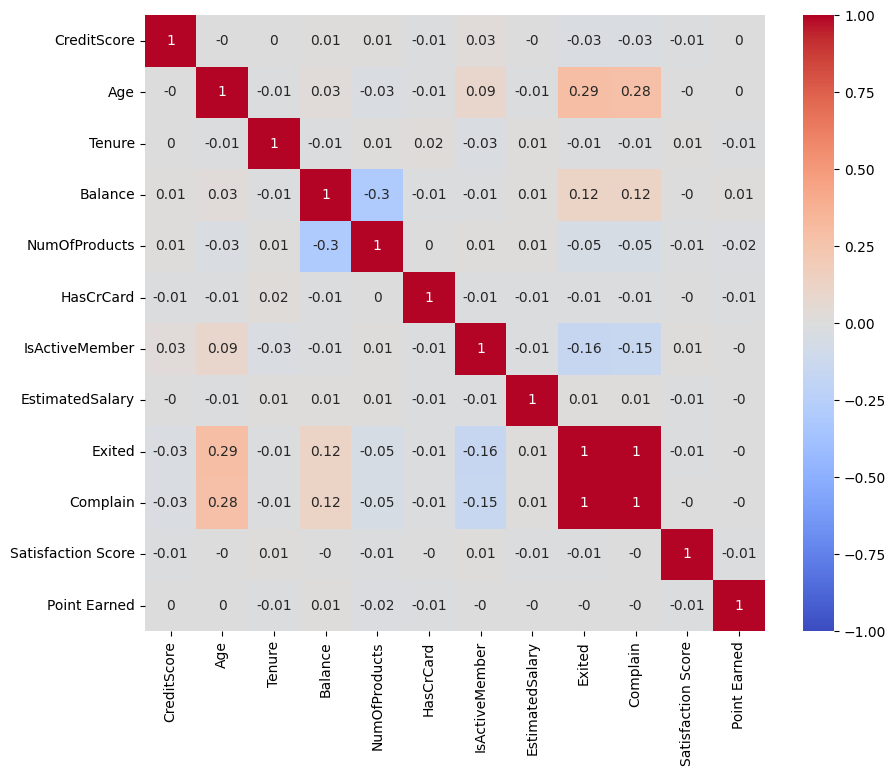

In [9]:
corr = churn_data.drop(['Geography', 'Gender', 'Card Type'], axis=1).corr().round(2)
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',center=0, vmin=-1, vmax=1)

We can see that the Complain variable is perfectly correlated with our label-Exited, so we eliminate the Complain variable. The rest of features do not show strong correlation between each others.

In [10]:
churn_data=churn_data.drop("Complain", axis=1)

## 2.3 Customer Profile Analysis

Text(0.5, 1.0, 'Age Distribution in Segmentation Data')

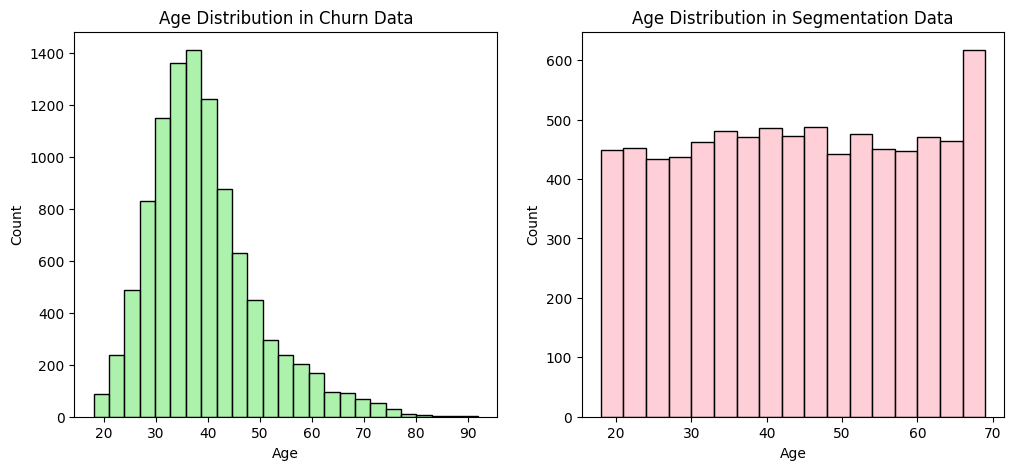

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(churn_data["Age"],binwidth=3, ax=axes[0], color="lightgreen")
axes[0].set_title("Age Distribution in Churn Data")

sns.histplot(seg_data["Age"], binwidth=3, ax=axes[1], color="pink") 
axes[1].set_title("Age Distribution in Segmentation Data")

Text(0.5, 1.0, 'Gender Distribution in Segmentation Data')

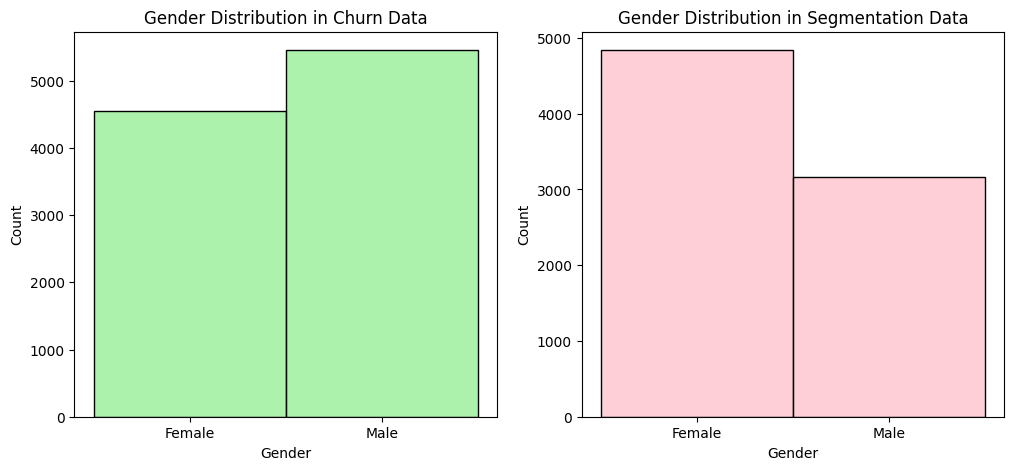

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(churn_data["Gender"],binwidth=3, ax=axes[0], color="lightgreen")
axes[0].set_title("Gender Distribution in Churn Data")

sns.histplot(seg_data["Gender"], binwidth=3, ax=axes[1], color="pink") 
axes[1].set_title("Gender Distribution in Segmentation Data")

Text(0.5, 1.0, 'Age Distribution across Gender in Segmentation Data')

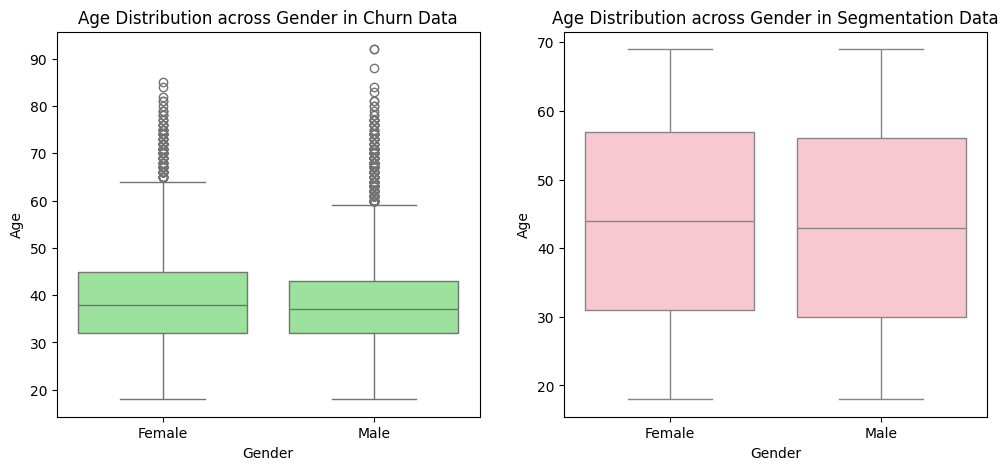

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=churn_data["Gender"], y= churn_data["Age"], ax=axes[0], color="lightgreen")
axes[0].set_title("Age Distribution across Gender in Churn Data")

sns.boxplot(x=seg_data["Gender"], y=seg_data["Age"], ax=axes[1], color="pink") 
axes[1].set_title("Age Distribution across Gender in Segmentation Data")

Text(0.5, 1.0, 'Income Distribution in Segmentation Data')

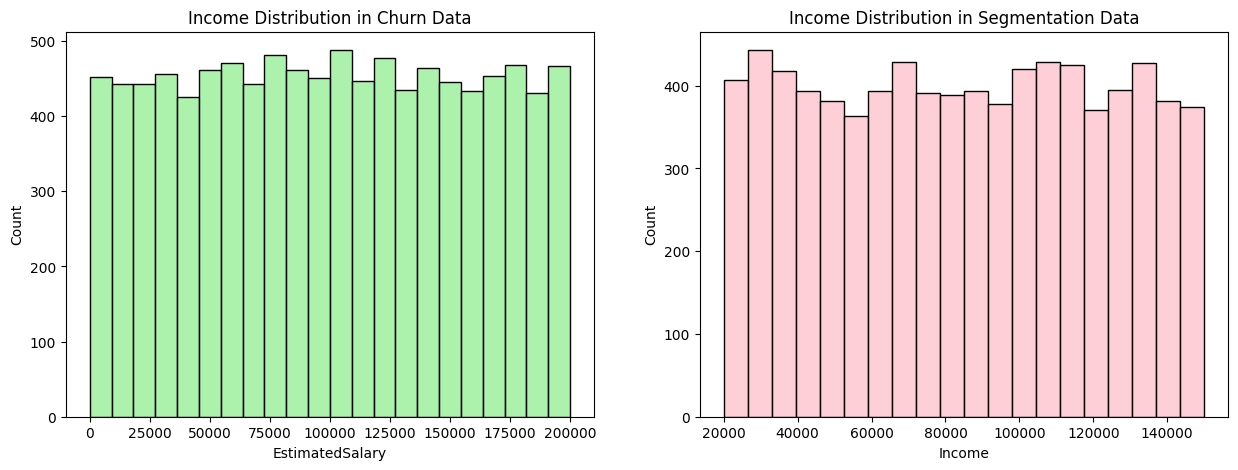

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(churn_data["EstimatedSalary"], ax=axes[0], color="lightgreen")
axes[0].set_title("Income Distribution in Churn Data")

sns.histplot(seg_data["Income"],  ax=axes[1], color="pink") 
axes[1].set_title("Income Distribution in Segmentation Data")

In [15]:
print("churn data:\n", churn_data["EstimatedSalary"].describe())
print("sgementation data:\n", seg_data["Income"].describe())

churn data:
 count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64
sgementation data:
 count      8000.000000
mean      84664.196750
std       37580.387945
min       20014.000000
25%       51744.500000
50%       84926.500000
75%      116815.750000
max      149986.000000
Name: Income, dtype: float64


From the visualization above, we can see that both datasets have similar income distributions. There is some difference in gender and age distribution. In customer churn dataset, age shows a slightly right skewed normal distribution and the number of males outweights the number of female. In customer segmentation dataset, age is more like a uniform distribution and the number of females outweight the number of males. Since the two datasets came from different sources, their customer profile cannot be the same. Now, we assume the 2 datasets have similar customer profiles and will use them to generate a new sythetic dataset. 

# 3.Data Preprocessing

In [16]:
bins = np.arange(0, 210000, 10000)
churn_data.loc[:, 'Income_bin'] = pd.cut(churn_data['EstimatedSalary'], bins=bins, right=False)
seg_data.loc[:, 'Income_bin'] = pd.cut(seg_data['Income'], bins=bins, right=False)

/var/folders/qm/8_36rzjx56b399w4_t60jq040000gn/T/ipykernel_20387/999369556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_data.loc[:, 'Income_bin'] = pd.cut(seg_data['Income'], bins=bins, right=False)


In [17]:
churn_train, churn_test = train_test_split(churn_data, random_state=42, stratify=churn_data["Exited"],test_size=0.3)
seg_train, seg_test = train_test_split(seg_data, random_state=42,test_size=0.3)

We split 2 datasets into train and test sets before we merge data to prevent the risk of data leakage.

In [18]:
# merge train data
train= pd.merge(
    churn_train,
    seg_train,
    left_on=['Age', 'Gender','Income_bin'],
    right_on=['Age', 'Gender','Income_bin'],
    how='inner'
)
train=train.drop_duplicates()
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18744 entries, 0 to 18743
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         18744 non-null  int64   
 1   Geography           18744 non-null  object  
 2   Gender              18744 non-null  object  
 3   Age                 18744 non-null  int64   
 4   Tenure              18744 non-null  int64   
 5   Balance             18744 non-null  float64 
 6   NumOfProducts       18744 non-null  int64   
 7   HasCrCard           18744 non-null  int64   
 8   IsActiveMember      18744 non-null  int64   
 9   EstimatedSalary     18744 non-null  float64 
 10  Exited              18744 non-null  int64   
 11  Satisfaction Score  18744 non-null  int64   
 12  Card Type           18744 non-null  object  
 13  Point Earned        18744 non-null  int64   
 14  Income_bin          18744 non-null  category
 15  Income              18744 non-null  

In [19]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()
cat_encoded=enc.fit_transform(train[['Geography', 'Gender', 'Card Type']])
train = train.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

train.loc[:,['Geography', 'Gender', 'Card Type']]=cat_encoded

In [20]:
X_train=train.drop(["Exited", "Income_bin"], axis=1)
y_train=train["Exited"].astype("category")

<Axes: xlabel='Exited', ylabel='Count'>

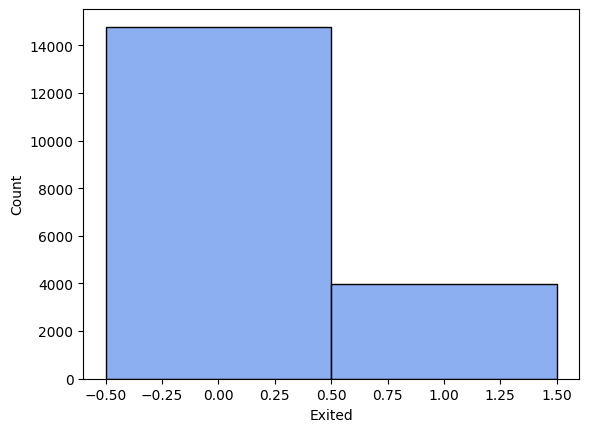

In [21]:
sns.histplot(y_train, color='cornflowerblue')

From the plot, we can see that the classes are imbalanced. Thus, we use SMOTE method to generate synthetic data and make the dataset balanced

In [22]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<Axes: xlabel='Exited', ylabel='Count'>

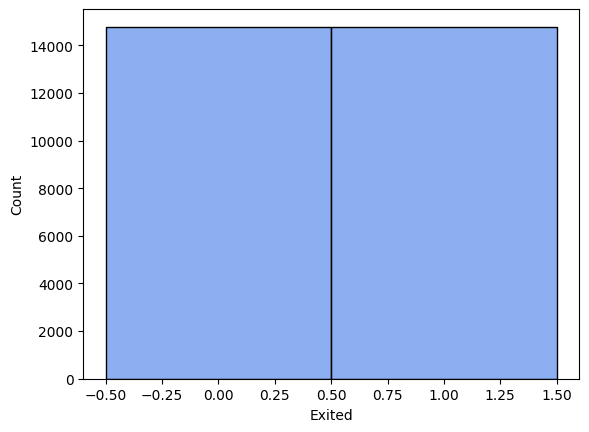

In [23]:
sns.histplot(y_train_resampled, color='cornflowerblue')

Now, we have 29566 training data after smote, with balanced classes.

In [24]:
test=pd.merge(
    churn_test,
    seg_test,
    left_on=['Age', 'Gender',"Income_bin"],
    right_on=['Age', 'Gender',"Income_bin"],
    how='inner'
)

test=test.drop_duplicates()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389 entries, 0 to 3388
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         3389 non-null   int64   
 1   Geography           3389 non-null   object  
 2   Gender              3389 non-null   object  
 3   Age                 3389 non-null   int64   
 4   Tenure              3389 non-null   int64   
 5   Balance             3389 non-null   float64 
 6   NumOfProducts       3389 non-null   int64   
 7   HasCrCard           3389 non-null   int64   
 8   IsActiveMember      3389 non-null   int64   
 9   EstimatedSalary     3389 non-null   float64 
 10  Exited              3389 non-null   int64   
 11  Satisfaction Score  3389 non-null   int64   
 12  Card Type           3389 non-null   object  
 13  Point Earned        3389 non-null   int64   
 14  Income_bin          3389 non-null   category
 15  Income              3389 non-null   in

In [25]:
cat_encoded1=enc.fit_transform(test[['Geography', 'Gender', 'Card Type']])
test = test.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

test.loc[:,['Geography', 'Gender', 'Card Type']]=cat_encoded1

In [26]:
X_test=test.drop(["Exited","Income_bin"],axis=1)
y_test=test["Exited"].astype("category")

In [49]:
#test=test.drop("Income_bin", axis=1)
#test.to_csv("B5_customer_churn_test.csv", index=False)

In [ ]:
#train1=pd.concat([X_train_resampled, y_train_resampled],axis=1)
#train1.to_csv("B5_customer_churn_train.csv", index=False)